# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple multivariate regression analyses using `statsmodels`;
- Use propensity score matching to estimate treatment effects;

---

## Important Dates

- Homework release: Fri 15 Nov 2024
- **Homework due**: Fri 29 Nov 2024, 23:59
- Grade release: Mon 09 Dec 2024

---

##  Some rules

1. You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.
2. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
3. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
4. In continuation to the previous point on additional library, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:

Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
Some of the TAs on this course literally published many works on detecting machine-generated text.

Here LLM includes but not limited to chatbots like ChatGPT, coding assistants like Copilot. Do not even use them to prettify your code or correct English. If you are caught using LLMs, you will be reported to the instructor and subject to the consequences. 


---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing ( 20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: Propensity Score Matching (10 points)

## Context

Within EPFL's master program, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in Switzerland !

Your mentor at the company Tim, has explained to you that the company is interested in a pricing model for used cars. 

- Tim: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Tim: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla-clean.csv` and `Task1-2.ToyotaCorolla-raw.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3
- `Task4.ToyotaCorolla_discount_sales` for Part 4

You should not use any other data source for this homework.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)





**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [424]:
#corolla_raw = pd.read_csv("data/Task1-2.ToyotaCorolla-raw.csv", sep = ',')
#corolla_raw.head(36)

## Initially running the two lines of code above yielded the following error message :
## "ParserError: Error tokenizing data. C error: Expected 11 fields in line 33, saw 12"
## The error originates in the price of the car being given as 15,646.9 instead of 15646.9, adding an unwanted delimiter
## The 'on bad lines' function is thus sued to skip that line initially yet still give a warning

corolla_raw = pd.read_csv("data/Task1-2.ToyotaCorolla-raw.csv", sep = ',', skiprows=[32])
corolla_raw.head(5)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23.0,46986.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,EURO
1,11878.0,23.0,72937.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
2,12050.0,24.0,41711.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
3,12914.0,26.0,48000.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1165.0,CHF
4,11878.0,30.0,38500.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1170.0,CHF


Line 33 is temporarily skipped

**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [425]:
print(corolla_raw[corolla_raw.isna().any(axis=1)])

                                                Price  Age Mileage FuelType  \
905  8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF  NaN     NaN      NaN   

     HP  MetColor  Automatic  CC  Doors  Weight Currency  
905 NaN       NaN        NaN NaN    NaN     NaN      NaN  


The problematic row has been identified. It has semi-colons as delimiters instead of commas, hence the error. 

In [426]:
corolla_raw.drop(index=905, inplace = True)
corolla_raw.head(5)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23.0,46986.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,EURO
1,11878.0,23.0,72937.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
2,12050.0,24.0,41711.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
3,12914.0,26.0,48000.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1165.0,CHF
4,11878.0,30.0,38500.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1170.0,CHF


**1.3 (4 pts): Compute the mean, median of the `Price` column.**

1. Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.
2. After computing the mean and median, do you think they are reasonable? If not, what could be the reason for this? 
  
Hint: Is all values in the `Price` column numerical?


In [427]:
#mean_price = corolla_raw['Price'].mean()
## The basic code does not work as a number of rows have prices in quotation marks. 
## These are strings that must be either removed or ideally converted into floats

corolla_raw['Price'] = corolla_raw['Price'].str.replace(',', '')
corolla_raw['Price'] = corolla_raw['Price'].str.replace('£', '')
corolla_raw['Price'] = pd.to_numeric(corolla_raw['Price'], errors='coerce')

mean_price = corolla_raw['Price'].mean()
print(mean_price)
median_price = corolla_raw['Price'].median()
print(median_price)

10730662030331.08
8595.0


The price does not make sense. Seems that there is a problematic value(s) somewhere - probably very few as the median is reasonable. 

In [428]:
maximum_price = 0
for index, row in corolla_raw.iterrows():
    if row['Price'] > maximum_price:
        maximum_price=row['Price']
        print(index)
print(maximum_price)

corolla_raw.loc[33]

corolla_raw.loc[33, 'Price'] = 1539.85


0
6
7
8
14
16
33
1.5398499999999998e+16


In [429]:
mean_price = corolla_raw['Price'].mean()
print(mean_price)

9426.230870313588


1.3 à nettoyer c'est très moche

**1.4 (4 pts): Convert Units**

From now on, we will work with the cleaned data `Task1-2.ToyotaCorolla-clean.csv`. Read it into a DataFrame.

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to CHF and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 CHF
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in EUR or GBP to CHF, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [430]:
corolla_clean = pd.read_csv("data/Task1-2.ToyotaCorolla-clean.csv", sep=',')
corolla_clean.head(10)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF
5,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170,CHF
6,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245,CHF
7,16068.0,30,75889.0,Diesel,90,1,0,2000,3,1245,CHF
8,18572.0,27,19700.0,Petrol,192,0,0,1800,3,1185,CHF
9,11187.0,23,71138.0,Diesel,69,0,0,1900,3,1105,CHF


Conversion 1: Currency conversion

In [431]:
def currency_conversion(dataframe, currency, rate):
    dataframe.loc[dataframe['Currency'] == currency, 'Price']*=rate
    dataframe['Price'] = dataframe['Price'].round(0)
    return dataframe

currency_conversion(corolla_clean, 'GBP', 1.15)
currency_conversion(corolla_clean, 'EURO', 0.95) ##maybe add something to make the rate computation in the function?
    

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,12825.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF
...,...,...,...,...,...,...,...,...,...,...,...
1431,6479.0,69,20544.0,Petrol,86,1,0,1300,3,1025,CHF
1432,9369.0,72,19000.0,Petrol,86,0,0,1300,3,1015,CHF
1433,7343.0,71,17016.0,Petrol,86,0,0,1300,3,1015,CHF
1434,6263.0,70,16916.0,Petrol,86,1,0,1300,3,1015,CHF


Conversion 2:  Mileage

In [432]:
miles_to_km = 1.61
corolla_clean.loc[corolla_clean['Currency']=='GBP', 'Mileage'] *= miles_to_km


In [433]:
corolla_clean.drop(columns='Currency', axis = 1, inplace=True)
corolla_clean.head(10)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12825.0,23,46986.0,Diesel,90,1,0,2000,3,1165
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170
5,11187.0,32,61000.0,Diesel,90,0,0,2000,3,1170
6,14599.0,27,94612.0,Diesel,90,1,0,2000,3,1245
7,16068.0,30,75889.0,Diesel,90,1,0,2000,3,1245
8,18572.0,27,19700.0,Petrol,192,0,0,1800,3,1185
9,11187.0,23,71138.0,Diesel,69,0,0,1900,3,1105


In [434]:
print("Data for price:")
print(corolla_clean['Price'].describe())
print('----------------------------------------------')
print("Data for mileage:")
print(corolla_clean['Mileage'].describe())

## I imagine distance is mileage
## Do we need to manually compute this?

Data for price:
count     1436.000000
mean      9420.997214
std       3218.121468
min       3758.000000
25%       7343.000000
50%       8595.000000
75%      10323.000000
max      28074.000000
Name: Price, dtype: float64
----------------------------------------------
Data for mileage:
count      1436.000000
mean      68533.259749
std       37506.448872
min           1.000000
25%       43000.000000
50%       63389.500000
75%       87020.750000
max      243000.000000
Name: Mileage, dtype: float64


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [435]:
def price_by(df, feature):
    output_list=[]
    df1=df[feature]
    df_cat=pd.get_dummies(df1)
    input_list = df_cat.columns.tolist()

    for item in input_list:
        df2=df[df[feature]==item]
        avg_price_by=df2['Price'].mean()
        avg_price_by = round(avg_price_by, 2)
        output_list.append([item, avg_price_by])
        print(f"The average price of a corolla with {item} {feature} is {avg_price_by}")
    
    max_item, max_avg_price = max(output_list, key=lambda x: x[1])
    print(f"The most expensive {feature} is {max_item} with an average price of {max_avg_price}")


Question A

In [436]:
price_by(corolla_clean, 'FuelType')

The average price of a corolla with CNG FuelType is 8383.24
The average price of a corolla with Diesel FuelType is 9876.28
The average price of a corolla with Petrol FuelType is 9379.12
The most expensive FuelType is Diesel with an average price of 9876.28


Question B

In [437]:
price_by(corolla_clean, 'Doors')

The average price of a corolla with 2 Doors is 6997.5
The average price of a corolla with 3 Doors is 8896.39
The average price of a corolla with 4 Doors is 8602.15
The average price of a corolla with 5 Doors is 10079.98
The most expensive Doors is 5 with an average price of 10079.98


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

Text(0.5, 1.0, 'Car price plotted as a function of car age')

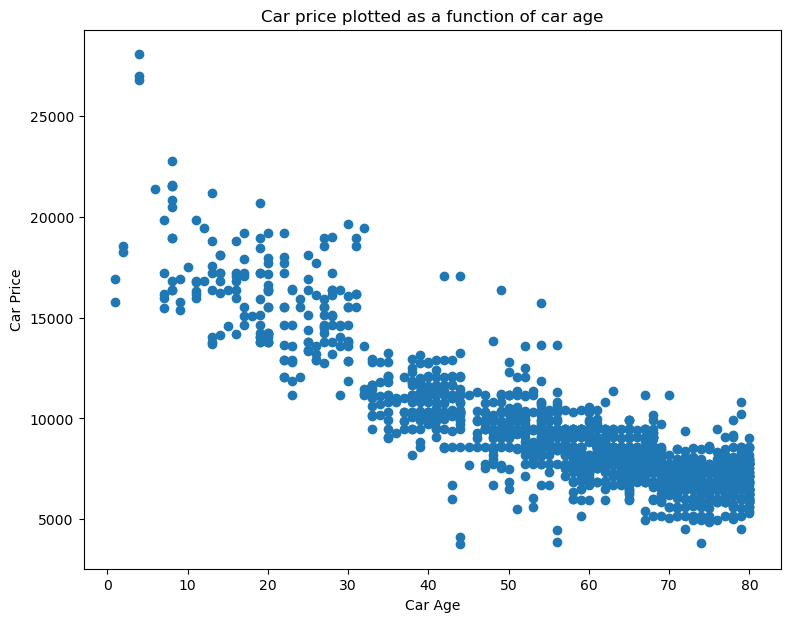

In [438]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(corolla_clean['Age'], corolla_clean['Price'])
ax.set_xlabel("Car Age")
ax.set_ylabel("Car Price")
ax.set_title("Car price plotted as a function of car age")

C:\Users\Karl Abdelnour\AppData\Local\Temp\ipykernel_20176\3994730726.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


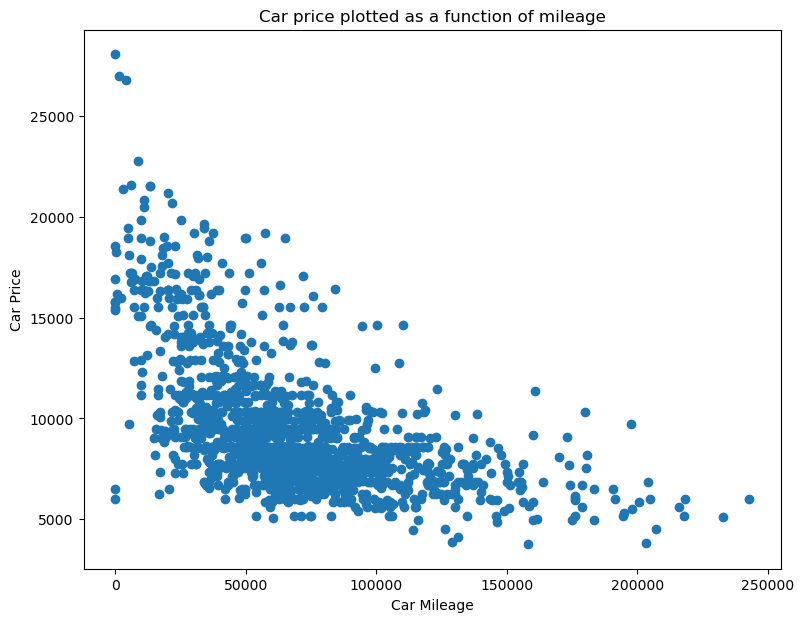

In [439]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(corolla_clean['Mileage'], corolla_clean['Price'])
ax.set_xlabel("Car Mileage")
ax.set_ylabel("Car Price")
ax.set_title("Car price plotted as a function of mileage")
fig.show()

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [440]:
pearson_corr = corolla_clean['Price'].corr(corolla_clean['Mileage'], method='pearson')
spearman_corr = corolla_clean['Price'].corr(corolla_clean['Mileage'], method='spearman')


B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

In [441]:
print(f"The Pearson correlation coefficient between mileage and car price is {pearson_corr}.")
print(f"The Spearman correlation coefficient between mileage and car price is {spearman_corr}.")

if np.abs(pearson_corr)>np.abs(spearman_corr):
    print(f"The Pearson correlation coefficient is greater than the Spearman correlation coefficient")
elif np.abs(pearson_corr)<np.abs(spearman_corr):
    print(f"The Spearman correlation coefficient is greater than the Pearson correlation coefficient")
else:
    print("Both are equal.")

The Pearson correlation coefficient between mileage and car price is -0.5634608418641661.
The Spearman correlation coefficient between mileage and car price is -0.6054038979933513.
The Spearman correlation coefficient is greater than the Pearson correlation coefficient


In absolute terms, the Spearman correlation is greater than the Pearson correlation.
This is likely due to how they are computed:
 - Spearman correlation tries to define how well the relationship between two values can be descirbed by a monotonic function. As a result, it is not linear and is less sensitive to outliers.
 - Pearson correlation defines a linear relationshipp between both values and is as a result more sensitive to outliers.
It is thus expected that the Spearman correlation is greater than the Pearson correlation as it is less sensitive to outliers that may skew the final result. In either case, the difference between the two correlations is not too significant here. A negative relationship is clearly identified between mileage and price yet may not be classified as linear.

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building machine learning models, how to asses performance is crucial. Hence we first implement some helper functions to asses the performance of our model. We can use these later throughout the exercise.

Implement the `accuracy` , `precision`, `recall` and `f1_score` functions with the following requirements:

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

Compare the results with the implementation in `sklearn` and see if they match.

In [442]:
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
## Just to load the np arrays that you gave

We first build a confusion matrix.

In [443]:
def confusion_matrix_constructor(prediction_array, true_array):
    TP = np.sum(np.logical_and(prediction_array == 1, true_array == 1))
    TN = np.sum(np.logical_and(prediction_array == 0, true_array == 0))
    FP = np.sum(np.logical_and(prediction_array == 1, true_array == 0))
    FN = np.sum(np.logical_and(prediction_array == 0, true_array == 1))
    confusion_matrix = np.asarray([[TP, FP], [FN, TN]])
    return confusion_matrix

test_conf_mat = confusion_matrix_constructor(predicted_labels, true_labels)

Eyeballing the answer indicates that it is correct. The accuracy, precision, recall and f1 score may now be computed.

In [444]:
def accuracy(confusion_matrix):
    [[TP, FP], [FN, TN]] = confusion_matrix.astype(float)

    accuracy = (TP+TN)/np.sum(confusion_matrix)
    accuracy = round(accuracy, 2)

    print(f"The accuracy of the model is {accuracy}")
    return accuracy

def precision(confusion_matrix):
    [[TP, FP], [FN, TN]] = confusion_matrix.astype(float)

    pos_precision = TP/(TP+FP)
    pos_precision = round(pos_precision, 2)
    neg_precision = TN/(TN+FN)
    neg_precision = round(neg_precision, 2)

    print(f"The positive and negative precisions are respectively {pos_precision} and {neg_precision}.")
    return pos_precision, neg_precision

def recall(confusion_matrix):
    [[TP, FP], [FN, TN]] = confusion_matrix.astype(float)

    pos_recall = TP/(TP+FN)
    pos_recall = round(pos_recall, 2)
    neg_recall = TN/(TN+FP)
    neg_recall = round(neg_recall, 2)

    print(f"The positive and negative recalls are respectively {pos_recall} and {neg_recall}.")
    return pos_recall, neg_recall

def f1_score(confusion_matrix):
    pos_precision, neg_precision = precision(confusion_matrix)
    pos_recall, neg_recall = recall(confusion_matrix)

    pos_f1 = 2 * (pos_precision * pos_recall) / (pos_precision + pos_recall)
    pos_f1 = round(pos_f1, 2)
    neg_f1 = 2 * (neg_precision * neg_recall) / (neg_precision + neg_recall)
    neg_f1 = round(neg_f1, 2)
    
    print(f"The positvie and negative f1 scores of the model are respectively {pos_f1} and {neg_f1}.")
    return pos_f1, neg_f1

In [445]:
## We first test the above functions for the test confusion matrix

accuracy(test_conf_mat)
precision(test_conf_mat)
recall(test_conf_mat)
f1_score(test_conf_mat)

The accuracy of the model is 0.7
The positive and negative precisions are respectively 0.67 and 0.75.
The positive and negative recalls are respectively 0.8 and 0.6.
The positive and negative precisions are respectively 0.67 and 0.75.
The positive and negative recalls are respectively 0.8 and 0.6.
The positvie and negative f1 scores of the model are respectively 0.73 and 0.67.


(0.73, 0.67)

Now that we have values for these parameters with the manual functions, we will compare them to those computed with sklearn.

In [446]:
import sklearn.metrics as skm ## automatically appeared when I inserted the funcions as described in sklearn documentation

sk_accuracy = skm.accuracy_score(true_labels, predicted_labels)
sk_precision_recall_f1 = skm.precision_recall_fscore_support(true_labels, predicted_labels)

print(sk_accuracy)
print(sk_precision_recall_f1)

0.7
(array([0.75      , 0.66666667]), array([0.6, 0.8]), array([0.66666667, 0.72727273]), array([5, 5], dtype=int64))


The results of the sklearn functions seem to be equal to those given by the manual functions. (à voir pour bien présenter, on dirait qu'il y a un truc chelou).


**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [447]:
#categorical_columns = ['FuelType']
corolla_clean_categorical = corolla_clean.copy()
corolla_clean_categorical = pd.get_dummies(corolla_clean_categorical, drop_first=True) ## drop_first set to true in order to avoid colinearity
corolla_clean_categorical.head(10)

,Price,Age,Mileage,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,12825.0,23,46986.0,90,1,0,2000,3,1165,True,False
1,11878.0,23,72937.0,90,1,0,2000,3,1165,True,False
2,12050.0,24,41711.0,90,1,0,2000,3,1165,True,False
3,12914.0,26,48000.0,90,0,0,2000,3,1165,True,False
4,11878.0,30,38500.0,90,0,0,2000,3,1170,True,False
5,11187.0,32,61000.0,90,0,0,2000,3,1170,True,False
6,14599.0,27,94612.0,90,1,0,2000,3,1245,True,False
7,16068.0,30,75889.0,90,1,0,2000,3,1245,True,False
8,18572.0,27,19700.0,192,0,0,1800,3,1185,False,True
9,11187.0,23,71138.0,69,0,0,1900,3,1105,True,False


We have eleven columns after encoding.

B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


All columns except for price are taken as features. The latter is, as a result, considered the target variable.

In [448]:
features_df = corolla_clean_categorical.drop('Price', axis=1)
features_df.head(10)

,Age,Mileage,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,23,46986.0,90,1,0,2000,3,1165,True,False
1,23,72937.0,90,1,0,2000,3,1165,True,False
2,24,41711.0,90,1,0,2000,3,1165,True,False
3,26,48000.0,90,0,0,2000,3,1165,True,False
4,30,38500.0,90,0,0,2000,3,1170,True,False
5,32,61000.0,90,0,0,2000,3,1170,True,False
6,27,94612.0,90,1,0,2000,3,1245,True,False
7,30,75889.0,90,1,0,2000,3,1245,True,False
8,27,19700.0,192,0,0,1800,3,1185,False,True
9,23,71138.0,69,0,0,1900,3,1105,True,False


In [449]:
target_df = corolla_clean_categorical['Price']
target_df.head(10) ##continue et tu verras d'où vient ce bug d'affichage

0    12825.0
1    11878.0
2    12050.0
3    12914.0
4    11878.0
5    11187.0
6    14599.0
7    16068.0
8    18572.0
9    11187.0
Name: Price, dtype: float64

In [450]:
from sklearn.model_selection import train_test_split

train_features_df, test_features_df, train_targets_df, test_targets_df = train_test_split(features_df, target_df, test_size=0.2, random_state=42)

train_features_df = train_features_df.reset_index(drop=True)
train_targets_df = train_targets_df.reset_index(drop=True)
test_features_df = test_features_df.reset_index(drop=True)
test_targets_df = test_targets_df.reset_index(drop=True)

print(f"The training dataframe has a size of {train_features_df.shape[0]}.")
print(f"The testing dataframe has a size of {test_features_df.shape[0]}.")

rapport = train_features_df.shape[0]/test_features_df.shape[0]
print(f"The ratio of train and test dataframe sizes is {rapport}, hence validating the split as described in the prompt.")

The training dataframe has a size of 1148.
The testing dataframe has a size of 288.
The ratio of train and test dataframe sizes is 3.986111111111111, hence validating the split as described in the prompt.


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

In [451]:
print(f"The total number of available data points is {corolla_clean.shape[0]}.")

The total number of available data points is 1436.


1436 data points are available in the cleaned data set that was subsequently split into different train and test dataframes for the rest of the analysis.
With such a number of data points, the dataset may be considered to be small. As a result, there are simply not enough data points available to be split into train-validation-test sets such that accurate results would be obtained from the machine learning analysis. The use of a train-test split may also be justified by the use of simple machine learning models in the scope of this course.

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [452]:
from sklearn.preprocessing import StandardScaler ##needed to use the function

## The standardisation function should only be applied to continous columns as applying it to binary ones does not make much sense.
def standardisation(test_df, train_df, continuous_columns):
    test_df_continuous = test_df[continuous_columns]
    test_df_binary = test_df.drop(columns=continuous_columns) 
    train_df_continuous = train_df[continuous_columns]
    train_df_binary = train_df.drop(columns=continuous_columns) 
    ## The dataframe is split into continuous and binary columns.
    
    scalar = StandardScaler()  ## The scalar is defined

    train_df_continuous_scaled = scalar.fit_transform(train_df_continuous)
    train_df_continuous_scaled = sm.add_constant(train_df_continuous_scaled)
    train_df_continuous_scaled = pd.DataFrame(train_df_continuous_scaled, columns=['Constant'] + continuous_columns)

    test_df_continuous_scaled = scalar.transform(test_df_continuous)
    test_df_continuous_scaled = sm.add_constant(test_df_continuous_scaled)
    test_df_continuous_scaled = pd.DataFrame(test_df_continuous_scaled, columns=['Constant'] + continuous_columns)

    train_df = pd.concat([train_df_continuous_scaled, train_df_binary], axis=1)
    test_df = pd.concat([test_df_continuous_scaled, test_df_binary], axis=1)

    return (test_df, train_df)

continuous_features = ['Age', 'Mileage', 'HP', 'CC', 'Doors', 'Weight']
[test_features_df, train_features_df] = standardisation(test_features_df, train_features_df, continuous_features)

print(f"The means of the training dataframe are as follows : \
      {train_features_df.mean()}")
print('-------------------------------------------------------------------')
print(f"The standard deviations of the training dataframe are as follows : \
      {train_features_df.std()}")

The means of the training dataframe are as follows :       Constant           1.000000e+00
Age                1.485455e-16
Mileage           -1.485455e-16
HP                 3.868373e-17
CC                -2.963174e-16
Doors              1.175985e-16
Weight            -6.854757e-16
MetColor           6.628920e-01
Automatic          5.662021e-02
FuelType_Diesel    1.132404e-01
FuelType_Petrol    8.719512e-01
dtype: float64
-------------------------------------------------------------------
The standard deviations of the training dataframe are as follows :       Constant           0.000000
Age                1.000436
Mileage            1.000436
HP                 1.000436
CC                 1.000436
Doors              1.000436
Weight             1.000436
MetColor           0.472928
Automatic          0.231216
FuelType_Diesel    0.317025
FuelType_Petrol    0.334290
dtype: float64


In [453]:
train_features_df.head(10)

,Constant,Age,Mileage,HP,CC,Doors,Weight,MetColor,Automatic,FuelType_Diesel,FuelType_Petrol
0,1.0,0.329691,-0.254372,-1.027080,-1.409744,1.009250,-0.745518,0,0,False,True
1,1.0,0.649448,-0.194054,0.590140,0.168246,-0.040224,-0.745518,1,0,False,True
2,1.0,-0.842750,-0.802147,0.590140,0.168246,1.009250,0.139056,1,0,False,True
3,1.0,1.022497,0.875038,0.590140,0.168246,1.009250,-0.057516,1,0,False,True
4,1.0,-1.802020,-0.893805,-0.285854,-0.883747,-1.089698,0.532200,1,0,False,True
5,1.0,-0.789457,0.324424,-2.172611,1.746235,1.009250,1.318488,1,0,True,False
6,1.0,0.329691,-0.205173,-1.027080,-1.409744,1.009250,-0.647232,1,0,False,True
7,1.0,-0.789457,-1.253327,-0.285854,-0.883747,-1.089698,-0.942090,0,0,False,True
8,1.0,0.329691,0.359320,0.590140,0.168246,-1.089698,-0.155802,1,0,False,True
9,1.0,-1.109214,-1.350214,0.590140,0.168246,1.009250,0.040770,1,0,False,True


In [454]:
test_features_df.head(10)

,Constant,Age,Mileage,HP,CC,Doors,Weight,MetColor,Automatic,FuelType_Diesel,FuelType_Petrol
0,1.0,-0.309822,-1.230797,-0.285854,-0.883747,-1.089698,-0.942090,1,0,False,True
1,1.0,0.649448,0.306379,0.590140,0.168246,-1.089698,-0.352374,1,0,False,True
2,1.0,0.169813,1.621919,-1.970458,2.272232,-0.040224,1.220202,1,0,True,False
3,1.0,0.809326,0.188927,0.590140,0.168246,1.009250,-0.057516,1,0,False,True
4,1.0,0.489569,-0.262201,0.590140,0.168246,1.009250,0.040770,0,0,False,True
5,1.0,1.288961,0.668687,0.590140,0.168246,1.009250,0.237342,1,0,False,True
6,1.0,0.596155,0.291306,0.590140,0.168246,-0.040224,-0.647232,1,0,False,True
7,1.0,1.075790,-0.308295,0.590140,0.168246,-1.089698,-0.450660,1,0,False,True
8,1.0,-1.215800,-0.449419,0.590140,0.168246,1.009250,0.040770,1,0,False,True
9,1.0,-0.629579,-0.835690,0.590140,0.168246,1.009250,0.139056,1,0,False,True


E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

Standardising on the entire data before splitting would lead to characteristics of the entire dataset being quantified for the rest of the machine learning analysis. 
After splitting the data, the training would thus involve training the dataset on ome of the test data's characteristics and standardisation. This leads to inaccurate final results and a analysis that could be qualified as useless.

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train and evaluate a linear regression model using the `statsmodels` library, complete the following steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [455]:
train_features_df['FuelType_Diesel'] = train_features_df['FuelType_Diesel'].astype(int)
train_features_df['FuelType_Petrol'] = train_features_df['FuelType_Petrol'].astype(int)
#I don't know why I needed to do this but okay, à voir

model = sm.OLS(train_targets_df, train_features_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     642.6
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:11:57   Log-Likelihood:                -9804.3
No. Observations:                1148   AIC:                         1.963e+04
Df Residuals:                    1137   BIC:                         1.969e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Constant         8318.7215    318.897     

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [456]:
from sklearn.metrics import mean_squared_error ## required to use the mean_squared_error function

train_target_predicted = results.predict(train_features_df)

rmse = np.sqrt(mean_squared_error(train_targets_df, train_target_predicted))

print(f"The RMSE of the model is {rmse}.")

The RMSE of the model is 1238.2054826371855.


The root mean squared error obtained in the previous cell indicates that every price prediction will be off by, on average, CHF1238.21.

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [457]:
from sklearn.metrics import r2_score ## required to use the r2_score function

r2 = r2_score(train_targets_df, train_target_predicted)

print(f"The R^2 of the model is {r2}.")

The R^2 of the model is 0.849659796266792.


An R2 of 0.85 indicates that the machine learning model was able to obtain around 85% of the variance regarding price. It has thus learned anough from the data it was trained on capture the behaviour of corolla price as a function of the defined feature variables.

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [458]:
p_values = results.pvalues
significant_features = p_values[p_values < 0.05]

print("The following features are statistically significant features at 5% level:")
print(significant_features)

The following features are statistically significant features at 5% level:
Constant           6.007027e-118
Age                1.014056e-206
Mileage             5.653091e-21
HP                  1.672421e-07
CC                  2.988428e-05
Weight              1.209704e-47
FuelType_Diesel     7.205345e-03
FuelType_Petrol     8.125200e-04
dtype: float64


5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

In [459]:
coefficients = results.params
coefficients = coefficients.drop("Constant", errors="ignore")
top_features = coefficients.abs().sort_values(ascending=False).head(2) ## The absolute value of the coefficient is taken to see which characteristic has the greatest overall impact on car price

print("Two features with the highest coefficients are:")
print(top_features)

Two features with the highest coefficients are:
Age                1978.771778
FuelType_Diesel    1450.178862
dtype: float64


In [460]:
print(coefficients['Age'])
print(coefficients['FuelType_Diesel'])

-1978.771777774188
1450.1788624535272


The results given above show that, disregarding the constant column, age and the car running on diesel have the largest impact on the car's final price. The coefficient for the age being negative implies that the price of the car will greatly decrease as it ages (which makes sense) while a positive value for the diesel fuel type indicates that the price of the car will increase when it is a diesel.

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

A number of features could potentially explain this remaining variance :
 - the maintenance of the car: we would assume that a car that has passed its maintenance and is in a good general state would yield higher prices than a car in a bad state.
 - the model of the car: some corolla models coudl potentially fetch higher prices than others due to asthetic reasons
 - the fuel efficiency of the car could also be a very important parameter as that's probably important if you're buying a used corolla in the first place (I have nothing against toyotas on the contrary)
 - the presence of stereo systems or bluetooth in the car can further be hypothesized to increase the car's price

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Tim to discuss this issue. Indeed, Tim suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

In [461]:
print(f"The coefficient for the weight of the car is {coefficients['Weight']}.")
print(f"The p-value for the weight of the car is {p_values['Weight']}.")

The coefficient for the weight of the car is 1105.4078222251537.
The p-value for the weight of the car is 1.2097035746552145e-47.


Contrasting weight's coefficient and p-value does demonstrate that weight is possibly confounded. A few explanations for this could be found.  A possible confounding variable here would be age. It could be reasonably assumed that older cars will be heavier than new ones due to advances in technology and engineering and that, as a result, age and weight could be strongly correlated to one another. Considering that age is a very important factor in car's price (see question 2.2.5), that could explain why the coefficient for weight is so high.

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.
  

In [462]:
train_features_inv_df = train_features_df.copy()
train_features_inv_df['Mileage-1'] = 1/train_features_inv_df['Mileage']

model_invmil = sm.OLS(train_targets_df, train_features_inv_df)
results_invmil = model_invmil.fit()
print(results_invmil.summary())
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     583.7
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:11:57   Log-Likelihood:                -9804.3
No. Observations:                1148   AIC:                         1.963e+04
Df Residuals:                    1136   BIC:                         1.969e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Constant         8318.9956    319.031     

The results of both linear regressions seem to be very similar to one another. As a result, one may conclude that the additin of the inverse mileage feature has not had a big effect on the predictions made by the linear regression.

REMPLACE TOUTES LES MENTIONS DE ML PAR REGRESSION LINEAIRE ICI§§§§§§§§§§§§§§§§§§§§§§

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Tim is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [463]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel  90         1          0  2000      3    1165   
1  13750   23  72937   Diesel  90         1          0  2000      3    1165   
2  13950   24  41711   Diesel  90         1          0  2000      3    1165   
3  14950   26  48000   Diesel  90         0          0  2000      3    1165   
4  13750   30  38500   Diesel  90         0          0  2000      3    1170   

   sold_within_3_months  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  



**3.1 (2 pts): Preprocess the Data**
1. （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [464]:
sold_within_three_months = data_df[data_df['sold_within_3_months'] == 1]
print(f"{sold_within_three_months.shape[0]} cars were sold within the first three months out of {data_df.shape[0]} cars at the dealership.")

880 cars were sold within the first three months out of 1436 cars at the dealership.


2. (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

The code used in question 2.1.A is reused here.

In [465]:
three_months = data_df.copy()
three_months_categorical = pd.get_dummies(three_months, drop_first=True) ## drop_first set to true in order to avoid colinearity
three_months_categorical.head(10)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,sold_within_3_months,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,True,False
1,13750,23,72937,90,1,0,2000,3,1165,0,True,False
2,13950,24,41711,90,1,0,2000,3,1165,0,True,False
3,14950,26,48000,90,0,0,2000,3,1165,0,True,False
4,13750,30,38500,90,0,0,2000,3,1170,0,True,False
5,12950,32,61000,90,0,0,2000,3,1170,0,True,False
6,16900,27,94612,90,1,0,2000,3,1245,0,True,False
7,18600,30,75889,90,1,0,2000,3,1245,0,True,False
8,21500,27,19700,192,0,0,1800,3,1185,0,False,True
9,12950,23,71138,69,0,0,1900,3,1105,0,True,False


**3.2 (20 pts): Logistic Regression Model**

1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [466]:
three_months_features_df = three_months_categorical.drop('sold_within_3_months', axis=1)
three_months_features_df.head(10)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,True,False
1,13750,23,72937,90,1,0,2000,3,1165,True,False
2,13950,24,41711,90,1,0,2000,3,1165,True,False
3,14950,26,48000,90,0,0,2000,3,1165,True,False
4,13750,30,38500,90,0,0,2000,3,1170,True,False
5,12950,32,61000,90,0,0,2000,3,1170,True,False
6,16900,27,94612,90,1,0,2000,3,1245,True,False
7,18600,30,75889,90,1,0,2000,3,1245,True,False
8,21500,27,19700,192,0,0,1800,3,1185,False,True
9,12950,23,71138,69,0,0,1900,3,1105,True,False


In [467]:
three_months_targets_df = three_months_categorical['sold_within_3_months']
three_months_targets_df.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: sold_within_3_months, dtype: int64

2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

The code used in question 2.1.B is recycled here.

In [468]:
## m3 is used to abreviate for 3 months for here on out in dataframe names
m3_train_features_df, m3_test_features_df, m3_train_targets_df, m3_test_targets_df =\
    train_test_split(three_months_features_df, three_months_targets_df, test_size=0.2, random_state=42)

m3_train_features_df = m3_train_features_df.reset_index(drop=True)
m3_train_targets_df = m3_train_targets_df.reset_index(drop=True)
m3_test_features_df = m3_test_features_df.reset_index(drop=True)
m3_test_targets_df = m3_test_targets_df.reset_index(drop=True)

print(f"The training dataframe has a size of {m3_train_features_df.shape[0]}.")
print(f"The testing dataframe has a size of {m3_test_features_df.shape[0]}.")

m3_rapport = m3_train_features_df.shape[0]/m3_test_features_df.shape[0]
print(f"The ratio of train and test dataframe sizes is {m3_rapport}, hence validating the split as described in the prompt.")

The training dataframe has a size of 1148.
The testing dataframe has a size of 288.
The ratio of train and test dataframe sizes is 3.986111111111111, hence validating the split as described in the prompt.


In [469]:
m3_test_features_df.head(10)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,10800,50,22500,97,1,0,1400,3,1025,False,True
1,9950,68,80426,110,1,0,1600,3,1055,False,True
2,7500,59,130000,72,1,0,2000,4,1135,True,False
3,9250,71,76000,110,1,0,1600,5,1070,False,True
4,9750,65,59000,110,0,0,1600,5,1075,False,True
5,9950,80,94079,110,1,0,1600,5,1085,False,True
6,9895,67,79858,110,1,0,1600,4,1040,False,True
7,6750,76,57263,110,1,0,1600,3,1050,False,True
8,13450,33,51945,110,1,0,1600,5,1075,False,True
9,12950,44,37389,110,1,0,1600,5,1080,False,True


In [470]:
m3_train_features_df.head(10)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,9500,62,59295,86,0,0,1300,5,1035,False,True
1,9795,68,61568,110,1,0,1600,4,1035,False,True
2,12950,40,38653,110,1,0,1600,5,1080,False,True
3,6450,75,101855,110,1,0,1600,5,1070,False,True
4,15750,22,35199,97,1,0,1400,3,1100,False,True
5,13250,41,81106,69,1,0,1900,5,1140,True,False
6,9750,62,61149,86,1,0,1300,5,1040,False,True
7,11950,41,21651,97,0,0,1400,3,1025,False,True
8,10450,62,82421,110,1,0,1600,3,1065,False,True
9,13995,35,18000,110,1,0,1600,5,1075,False,True


3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

The standardisation function defined in question 2.1.C is reused here.

In [471]:
m3_continuous_features = ['Age', 'KM', 'HP', 'CC', 'Doors', 'Weight']
[m3_test_features_standardised_df, m3_train_features_standardised_df] = \
    standardisation(m3_test_features_df, m3_train_features_df, m3_continuous_features)

In [472]:
m3_test_features_standardised_df.head(10)

,Constant,Age,KM,HP,CC,Doors,Weight,Price,MetColor,Automatic,FuelType_Diesel,FuelType_Petrol
0,1.0,-0.309822,-1.230797,-0.285854,-0.883747,-1.089698,-0.942090,10800,1,0,False,True
1,1.0,0.649448,0.306379,0.590140,0.168246,-1.089698,-0.352374,9950,1,0,False,True
2,1.0,0.169813,1.621919,-1.970458,2.272232,-0.040224,1.220202,7500,1,0,True,False
3,1.0,0.809326,0.188927,0.590140,0.168246,1.009250,-0.057516,9250,1,0,False,True
4,1.0,0.489569,-0.262201,0.590140,0.168246,1.009250,0.040770,9750,0,0,False,True
5,1.0,1.288961,0.668687,0.590140,0.168246,1.009250,0.237342,9950,1,0,False,True
6,1.0,0.596155,0.291306,0.590140,0.168246,-0.040224,-0.647232,9895,1,0,False,True
7,1.0,1.075790,-0.308295,0.590140,0.168246,-1.089698,-0.450660,6750,1,0,False,True
8,1.0,-1.215800,-0.449419,0.590140,0.168246,1.009250,0.040770,13450,1,0,False,True
9,1.0,-0.629579,-0.835690,0.590140,0.168246,1.009250,0.139056,12950,1,0,False,True


In [473]:
m3_train_features_standardised_df.head(10)

,Constant,Age,KM,HP,CC,Doors,Weight,Price,MetColor,Automatic,FuelType_Diesel,FuelType_Petrol
0,1.0,0.329691,-0.254372,-1.027080,-1.409744,1.009250,-0.745518,9500,0,0,False,True
1,1.0,0.649448,-0.194054,0.590140,0.168246,-0.040224,-0.745518,9795,1,0,False,True
2,1.0,-0.842750,-0.802147,0.590140,0.168246,1.009250,0.139056,12950,1,0,False,True
3,1.0,1.022497,0.875038,0.590140,0.168246,1.009250,-0.057516,6450,1,0,False,True
4,1.0,-1.802020,-0.893805,-0.285854,-0.883747,-1.089698,0.532200,15750,1,0,False,True
5,1.0,-0.789457,0.324424,-2.172611,1.746235,1.009250,1.318488,13250,1,0,True,False
6,1.0,0.329691,-0.205173,-1.027080,-1.409744,1.009250,-0.647232,9750,1,0,False,True
7,1.0,-0.789457,-1.253327,-0.285854,-0.883747,-1.089698,-0.942090,11950,0,0,False,True
8,1.0,0.329691,0.359320,0.590140,0.168246,-1.089698,-0.155802,10450,1,0,False,True
9,1.0,-1.109214,-1.350214,0.590140,0.168246,1.009250,0.040770,13995,1,0,False,True


4. (2 pts) Fit a logistic regression model on the training dataset.

In [474]:
m3_train_features_standardised_df['FuelType_Diesel'] = m3_train_features_standardised_df['FuelType_Diesel'].astype(int)
m3_train_features_standardised_df['FuelType_Petrol'] = m3_train_features_standardised_df['FuelType_Petrol'].astype(int)
# I should maybe try to add this in the standardisation function itself?

m3_model = sm.Logit(m3_train_targets_df, m3_train_features_standardised_df)
m3_results = m3_model.fit()
print(m3_results.summary())

Optimization terminated successfully.
         Current function value: 0.165946
         Iterations 10
                            Logit Regression Results                            
Dep. Variable:     sold_within_3_months   No. Observations:                 1148
Model:                            Logit   Df Residuals:                     1136
Method:                             MLE   Df Model:                           11
Date:                  Sun, 24 Nov 2024   Pseudo R-squ.:                  0.7510
Time:                          15:11:58   Log-Likelihood:                -190.51
converged:                         True   LL-Null:                       -765.10
Covariance Type:              nonrobust   LLR p-value:                1.435e-239
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Constant           29.7177      3.068      9.685      0.000      23.704      35.7

5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [475]:
from sklearn.metrics import accuracy_score

m3_test_features_standardised_df['FuelType_Diesel'] = m3_test_features_standardised_df['FuelType_Diesel'].astype(int)
m3_test_features_standardised_df['FuelType_Petrol'] = m3_test_features_standardised_df['FuelType_Petrol'].astype(int)


m3_test_predicted = m3_results.predict(m3_test_features_standardised_df)
m3_test_predicted = (m3_test_predicted>= 0.5).astype(int)
accuracy_05 = accuracy_score(m3_test_targets_df, m3_test_predicted)
print(f"The model has an accuracy of {accuracy_05}")

The model has an accuracy of 0.9305555555555556


6. (2 pts) Calculate the precision, recall, and F1-score.

In [476]:
from sklearn.metrics import classification_report ## required to use the classification_report function

print(classification_report(m3_test_targets_df, m3_test_predicted))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       114
           1       0.94      0.95      0.94       174

    accuracy                           0.93       288
   macro avg       0.93      0.93      0.93       288
weighted avg       0.93      0.93      0.93       288



The results above show that both the macro average and weighted average of the precision, recall and f1-score of the trained model are of 0.93.


7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly. How should you adjust the threshold for the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

The company would use the following model to determine what cars are not sold after three months before decreasing their price in order to generate more cashflow. Setting a threshold at 0.5 means that cars with a predicted sell probability of 0.5 after three months are counted as sold and vice versa.

As such, increasing the threshold would make more sense as it would count more cars as not likely to be sold within the next three months thus decreasing their price and increasing the dealership's cashflow.

In [477]:
print(classification_report(m3_test_targets_df, m3_test_predicted))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       114
           1       0.94      0.95      0.94       174

    accuracy                           0.93       288
   macro avg       0.93      0.93      0.93       288
weighted avg       0.93      0.93      0.93       288



In [478]:
## Decreased threshold test

m3_test_predicted_t03 = m3_results.predict(m3_test_features_standardised_df)
m3_test_predicted_t03 = (m3_test_predicted_t03>= 0.3).astype(int)
accuracy_03 = accuracy_score(m3_test_targets_df, m3_test_predicted_t03)
print(f"The model has an accuracy of {accuracy_03} when the threshold is set at 0.3.")
print(classification_report(m3_test_targets_df, m3_test_predicted_t03))

The model has an accuracy of 0.9201388888888888 when the threshold is set at 0.3.
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       114
           1       0.89      0.99      0.94       174

    accuracy                           0.92       288
   macro avg       0.94      0.90      0.91       288
weighted avg       0.93      0.92      0.92       288



In [479]:
## Increased threshold test

m3_test_predicted_t07 = m3_results.predict(m3_test_features_standardised_df)
m3_test_predicted_t07 = (m3_test_predicted_t07>= 0.7).astype(int)
accuracy_07 = accuracy_score(m3_test_targets_df, m3_test_predicted_t07)
print(f"The model has an accuracy of {accuracy_07} when the threshold is set at 0.7.")
print(classification_report(m3_test_targets_df, m3_test_predicted_t07))

The model has an accuracy of 0.9270833333333334 when the threshold is set at 0.7.
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       114
           1       0.95      0.93      0.94       174

    accuracy                           0.93       288
   macro avg       0.92      0.93      0.92       288
weighted avg       0.93      0.93      0.93       288



The initial model report given in question 3.2.6 highlighted the regularity of using a threshold of 0.5 as all of the macro and weighed precisions, recalls and f1 scores had a value of 0.93. 
The results above show that increasing the threshold reduces overall precision by making it much more unequal between the 0 and 1 classes, going from 0.92 and 0.94 at 0.5 to 0.89 and 0.95 at 0.7 . Meanwhile, the overall recall remains the same at 0.93 but becomes the same for both classes.
On the other hand, decreasing the threshold has the opposite effect: the precision becomes greater for class 0 an lower for class 1 while increasing as a whole while recall increases for class 1 yet decreases for class 0 and as a whole. 

In general for classes 0:
 - increasing the threshold decreases precision and increases recall
 - decreasing the threshold increases precision and increases recall

The opposite effect is observed for class 1:
 - increasing the threshold increases precision and decreases recall
 - decreasing the threshold decreases precision and increases recall

A REVOIR APRES LA FORMULATION DE MES PHRASES EST ASSEZ MITEUSE

8. (6 pts) Use binary search to find the optimal threshold that maximizes the F1-score. Implement a binary search algorithm to find the threshold that maximizes the f1-score of the logistic regression model on the training set. The search interval should be between 0 and 1, and the stopping criterion is 10 iterations.  What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

In [480]:
from sklearn.metrics import f1_score ## used instead of classification_report in order to only obtain the f1 score

def find_optimal_threshold(y_pred, y_true, max_iterations, low_point, high_point):
    optimal_threshold = 0
    best_f1 = 0

    for i in range(max_iterations):
        mid = (high_point + low_point) / 2

        y_pred_mid = (y_pred >= mid).astype(int)
        f1_mid = f1_score(y_true, y_pred_mid)

        y_pred_low = (y_pred >= low_point).astype(int)
        f1_low = f1_score(y_true, y_pred_low)

        y_pred_high = (y_pred >= high_point).astype(int)
        f1_high = f1_score(y_true, y_pred_high)

        if f1_mid > best_f1:
            best_f1 = f1_mid
            optimal_threshold = mid
        if f1_low >= f1_high:
            high_point = mid
        else:
            low_point = mid

    return optimal_threshold, best_f1


find_optimal_threshold(m3_test_predicted, m3_test_targets_df, 10, 0, 1)

##vrmnt pas sur

(0.5, 0.9428571428571428)

**3.3(18 pts) Decision Tree Model**

Use a Decision Tree model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train a Decision Tree Classifier to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility in `DecisionTreeClassifier`.

In [481]:
from sklearn.tree import DecisionTreeClassifier

DT1 = DecisionTreeClassifier(random_state=42)
DT1.fit(m3_train_features_df, m3_train_targets_df) ## to use standardised variables or not

DecisionTreeClassifier(random_state=42)

2. (2 pts) Evaluate the model on the test set and report the depth of the tree.

In [482]:
from sklearn.metrics import precision_score, recall_score 

m3_test_predicted_DT1_df = DT1.predict(m3_test_features_df)
DT1_accuracy = accuracy_score(m3_test_targets_df, m3_test_predicted_DT1_df) ## is the accuracy what they mean by evaluate? or just fit it?
DT1_precision = precision_score(m3_test_targets_df, m3_test_predicted_DT1_df)  
DT1_recall = recall_score(m3_test_targets_df, m3_test_predicted_DT1_df)
DT1_f1 = f1_score(m3_test_targets_df, m3_test_predicted_DT1_df)
DT1_depth = DT1.get_depth()

print(f"The decision tree model has the following characteristics:")
print(f"    - an accuracy of {DT1_accuracy}")
print(f"    - a recall of {DT1_recall}")
print(f"    - an f1-score of {DT1_f1}")
print(f"    - a depth of {DT1_depth}")

The decision tree model has the following characteristics:
    - an accuracy of 0.9166666666666666
    - a recall of 0.9425287356321839
    - an f1-score of 0.9318181818181818
    - a depth of 16


3. (2 pts) Visualize the Decision Tree

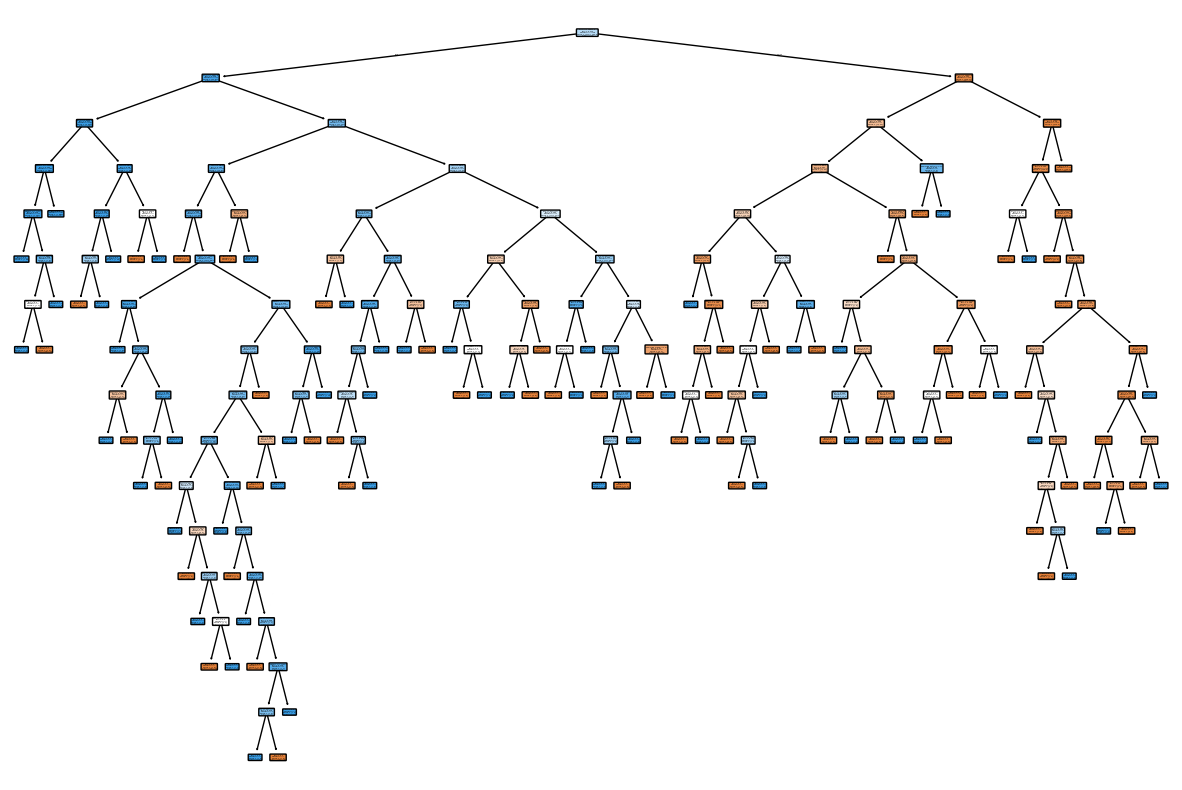

In [483]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))  
plot_tree(DT1, feature_names = m3_train_features_df.columns, class_names=['Not Sold', 'Sold'], filled=True, rounded=True)
plt.show()

4. (2 pts) Retrain the Decision Tree Classifier with a maximum depth of 8 and evaluate it on the test set. Compare and explain the results.

In [484]:
DT2 = DecisionTreeClassifier(max_depth=8, random_state=42)
DT2.fit(m3_train_features_df, m3_train_targets_df) 
m3_test_predicted_DT2_df = DT2.predict(m3_test_features_df)

DT2_accuracy = accuracy_score(m3_test_targets_df, m3_test_predicted_DT2_df) 
DT2_precision = precision_score(m3_test_targets_df, m3_test_predicted_DT2_df)  
DT2_recall = recall_score(m3_test_targets_df, m3_test_predicted_DT2_df)
DT2_f1 = f1_score(m3_test_targets_df, m3_test_predicted_DT2_df)
DT2_depth = DT2.get_depth()

print(f"The new decision tree model has the following characteristics:")
print(f"    - an accuracy of {DT2_accuracy} compared to {DT1_accuracy}")
print(f"    - a recall of {DT2_recall} compared to {DT1_recall}")
print(f"    - an f1-score of {DT2_f1} compared to {DT1_f1}")
print(f"    - a depth of {DT2_depth} compared to {DT1_depth}")

The new decision tree model has the following characteristics:
    - an accuracy of 0.9201388888888888 compared to 0.9166666666666666
    - a recall of 0.9540229885057471 compared to 0.9425287356321839
    - an f1-score of 0.9352112676056338 compared to 0.9318181818181818
    - a depth of 8 compared to 16


The results printed above highlight the fact that the second decision tree with a limited tree depth of 8 has better accuracy, recall, precision and f1-score than the initial decision tree model that was trained without any depth restrictions.

This is likely due to the second model being better at generalisations than the first one due to the limited depth preventing overfitting from happening which likely occured in the case of the first decision tree model.

5. (6 pts) Train a Decision Tree Classifier for each depth from 1 to D where D is the maximum depth of the Decision Tree Classifier seen in the previous step. Evaluate each model on the test set and plot the accuracy of the models as a function of the depth and find the optimal depth.


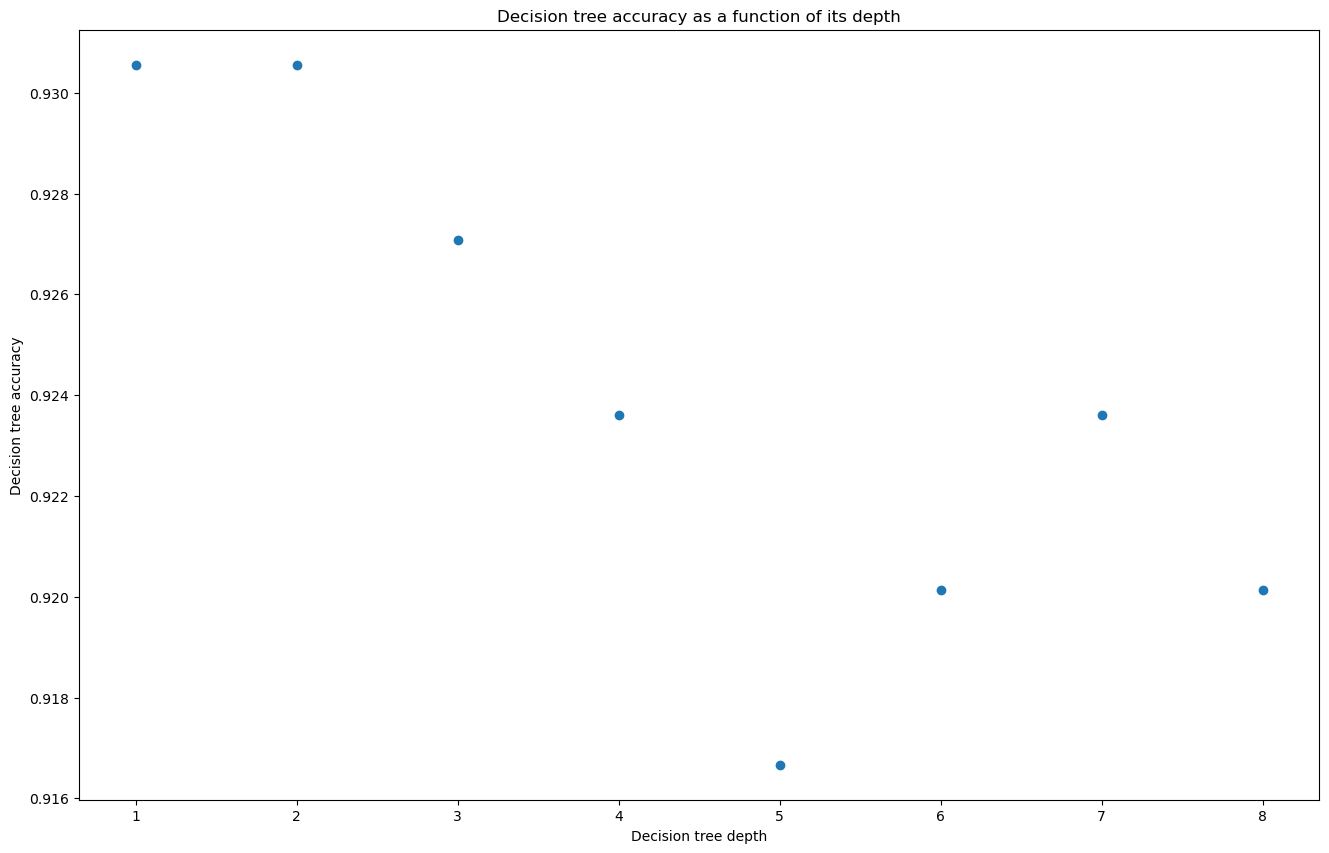

In [485]:
D = DT2_depth
#print(D)

Depth = []
Accuracy = []


for i in range(1, D+1):
    DTi = DecisionTreeClassifier(max_depth=i, random_state = 42)
    DTi.fit(m3_train_features_df, m3_train_targets_df) 
    m3_test_predicted_DTi_df = DTi.predict(m3_test_features_df)

    DTi_depth = DTi.get_depth()
    Depth.append(DTi_depth)
    DTi_accuracy = accuracy_score(m3_test_targets_df, m3_test_predicted_DTi_df) 
    Accuracy.append(DTi_accuracy)

DT = pd.DataFrame({'Depth' : Depth, 'Accuracy': Accuracy})

plt.figure(figsize= (16, 10))
plt.scatter(DT['Depth'], DT['Accuracy'])
plt.xlabel('Decision tree depth')
plt.ylabel('Decision tree accuracy')
plt.title('Decision tree accuracy as a function of its depth')
plt.show()


6. (4 pts) Train a decision tree of depth = 1 , visualize the tree and explain what is the decision rule at the root node.

In [486]:
m3_train_features_df.head(5)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,9500,62,59295,86,0,0,1300,5,1035,False,True
1,9795,68,61568,110,1,0,1600,4,1035,False,True
2,12950,40,38653,110,1,0,1600,5,1080,False,True
3,6450,75,101855,110,1,0,1600,5,1070,False,True
4,15750,22,35199,97,1,0,1400,3,1100,False,True


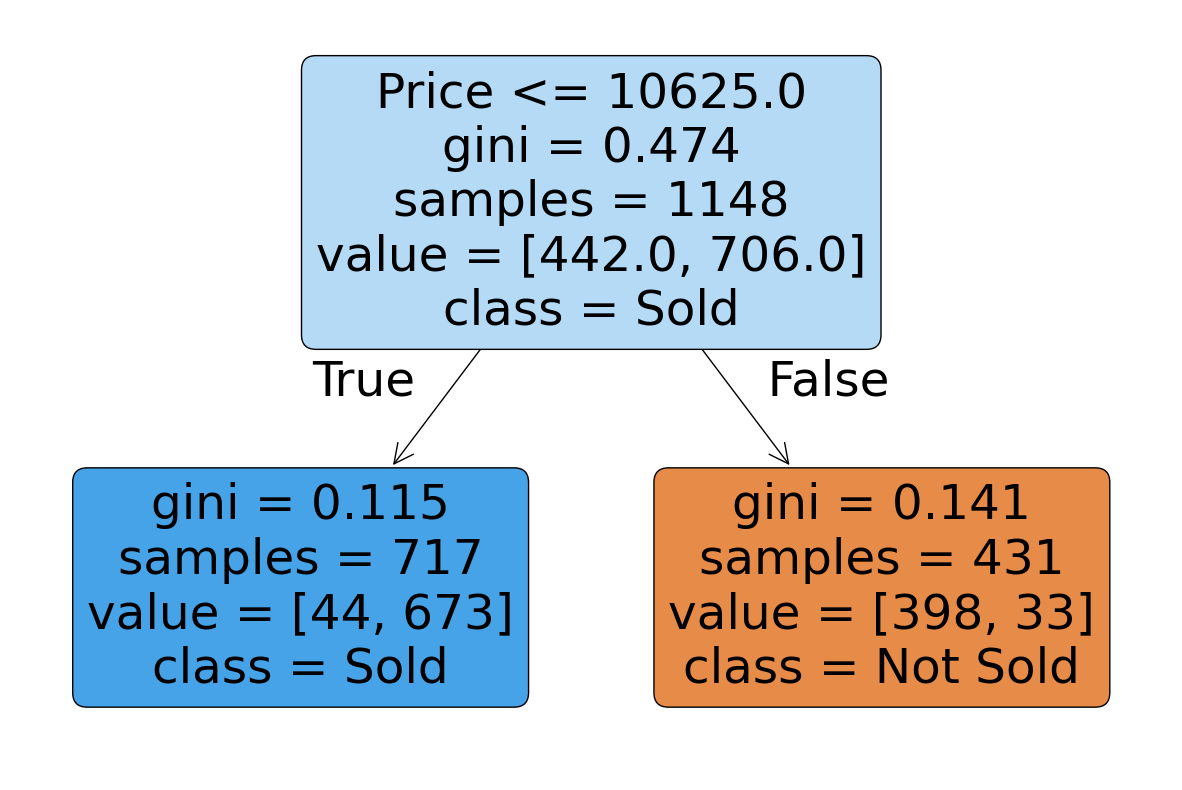

In [487]:
DT3 = DecisionTreeClassifier(max_depth=1, random_state=42)
DT3.fit(m3_train_features_df, m3_train_targets_df)
m3_test_predicted_DT3_df = DT3.predict(m3_test_features_df)


plt.figure(figsize=(15, 10))  
plot_tree(DT3, feature_names = m3_train_features_df.columns, class_names=['Not Sold', 'Sold'], filled=True, rounded=True)
plt.show()

## Part 4 Propensity Score Matching (10 pts)

Your mentor is thrilled with the progress, and he has asked Ivan to put the model into production. Based on the model's prediction, the sales manager Ivan will decide whether to lower the car's price by 5%.

A new quarter has passed, and Ivan has collected updated sales data, which includes the following columns:

- `Price`: The initial price of the car.
- `Pred_Prob`: The predicted probability of the car being sold within the first three months.
- `Applied_Discount`: Whether the discount was applied (Yes=1, No=0).
- `Discounted_Price`: The car's final price, calculated as `Price * 95%` if the discount was applied; otherwise, it's equal to `Price`.
- `Sold_within_3_months`: Whether the car was sold within the first three months (Yes=1, No=0).

Your task is to estimate the causal effect of the discount on sales within the first three months using propensity score matching.

In [488]:
data_df = pd.read_csv('data/Task4.ToyotaCorolla_discount_sales.csv', index_col=0)
print(data_df.head())

   Price  Pred_Prob  Applied_Discount  Discounted_Price  Sold_within_3_months
0  12750       0.01                 1           11475.0                     1
1  21950       0.00                 1           19755.0                     1
2   9950       0.79                 0            9950.0                     1
3   9930       0.91                 1            8937.0                     0
4   9450       0.97                 0            9450.0                     0


**4.1 (1 pts): How many samples are in the treated group, and how many are in the control group?**

In this case, the control group correspnds to cars whose prices was not discounted while the treated group includes all of the cars whose prices were discounted by 5%.

In [500]:
discounted_corolla = data_df.copy()

control_group = discounted_corolla[discounted_corolla['Applied_Discount'] == 0]
treated_group = discounted_corolla[discounted_corolla['Applied_Discount'] == 1]

print(f"{control_group.shape[0]} cars are in the control group compared to {treated_group.shape[0]} in the treated group for a total of {discounted_corolla.shape[0]} samples.")

118 cars are in the control group compared to 82 in the treated group for a total of 200 samples.



**4.2 (5 pts): Propensity Score Matching**
- The propensity score is the predicted probability of the car being sold within the first three months from the logistic regression model, i.e. `Pred_Prob` column in the `Task4.ToyotaCorolla_discount_sales.csv` file. Create pairs of matched samples as follows:
  - For each treated sample (discount applied), find a control sample (discount not applied) with a difference in propensity score of less than 0.05.
  - If there is more than one control sample for a treated sample, choose the control sample with the smallest difference in propensity score.
  - If there is no control sample satisfying the condition, discard the treated sample.
  - How many successful matches did you get?

Notice that your output should be 1-to-1 matching, meaning that each treated sample should be matched with at most one control sample.
So each sample can only appear once in the pairs.

In [508]:
def corolla_matching(treated_df, control_df):
    treated_matching_df = treated_df.copy()
    control_treated_df = control_df.copy()  # ensuring that no unwanted changes are made to the input df's

    treated_matched = []
    control_matched = []

    for idx, treated in treated_matching_df.iterrows():
        t_propensity = treated['Pred_Prob']  
        potential_matches = control_treated_df[np.abs(control_treated_df['Pred_Prob'] - t_propensity) < 0.05]

        if potential_matches.shape[0] == 1:
            treated_matched.append(treated.name)  
            control_matched.append(potential_matches.index[0])  
        else:
            min_difference = 0.05
            matched_control = None
            for _, match in potential_matches.iterrows():
                if np.abs(t_propensity - match['Pred_Prob']) < min_difference:
                    min_difference = np.abs(t_propensity - match['Pred_Prob'])  
                    matched_control = match
            
            if matched_control is not None:
                treated_matched.append(treated.name)
                control_matched.append(matched_control.name)
                control_treated_df.drop(index=matched_control.name, inplace=True)
    
    matched_pairs = pd.DataFrame({'Treated': treated_matched, 'Control': control_matched})
    number_of_pairs = matched_pairs.shape[0]
    print(f"There are {number_of_pairs} matched pairs.")

    return matched_pairs



In [511]:
matched_corollas = corolla_matching(treated_group, control_group)
matched_corollas.head(10)

There are 78 matched pairs.


,Treated,Control
0,0,142
1,1,32
2,3,27
3,5,35
4,6,56
5,7,9
6,11,120
7,13,12
8,14,87
9,18,85


**4.3 (4 pts): Average Treatment Effect (ATE)**

Now let's estimate the effect of the discount on sales. 

For each matched pair, there is one treated sample and one control sample. They may have different outcomes and we can calculate the average treatment effect (ATE) as 

$$ ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\\control}^{(i)} $$ 

where $y_{treat}^{(i)}$ and $y_{\\control}^{(i)}$ are the outcomes for the treated and control samples, respectively.

Notice that here the outcome is a simple binary variable, which is whether the car was sold within the first three months or not.

1. (3 pts) Calculate the ATE based on the matched pairs and report the result



In [513]:
def calculate_ate(matched_pairs, treated_df, control_df):
    treated_outcomes = treated_df.loc[matched_pairs['Treated'], 'Sold_within_3_months'].values
    control_outcomes = control_df.loc[matched_pairs['Control'], 'Sold_within_3_months'].values

    differences = treated_outcomes - control_outcomes
    ate = differences.mean()
    
    return ate

ate = calculate_ate(matched_corollas, treated_group, control_group)
print(ate)

0.5


2. (1 pts) What is your conclusion about the effect of the discount on sales within the first three months?

An average treatement effect of 0.5 as computed above implies that applying a discount on a car increases its chances of being sold within the first three months by 50% which is significant and confirms the anamysis performed at the end of part 3 that highlighted the primordial importance of price in whether a car would be sold within the first three months or not.